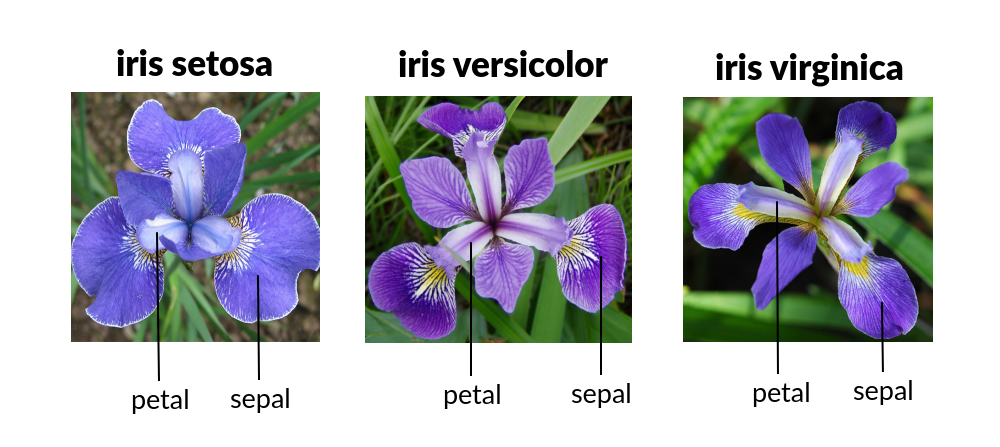

In [1]:
from IPython.display import Image
Image(filename='Iris-class.png')

# Niezbędne Biblioteki


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Tabela Opisowa

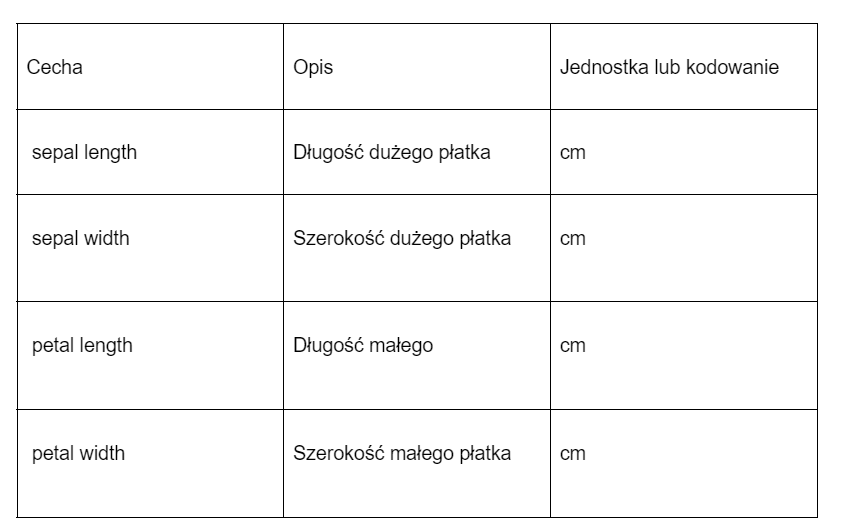

In [3]:
Image(filename='tabela_opisowa.png')

# Wczytanie Danych

In [4]:
iris = fetch_ucirepo(id=53) 
iris_df = pd.concat([iris.data.features, iris.data.targets], axis=1)

# Wstępne zapoznanie się z danymi

In [5]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
print(iris_df.shape)

(150, 5)


In [7]:
print(iris_df.columns)

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


In [8]:
print(iris_df.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [9]:
print(iris_df.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
print(iris_df['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [11]:
print(iris_df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


# Statystyki opisowe dla każdego gatunku

In [12]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
print(iris_df.groupby('class').describe())

                sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width                                                \
                      count   mean       std  min    25%  50%    75%  max   
class                                                                       
Iris-setosa            50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4   
Iris-versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Iris-virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

                petal length                                               \
   

In [13]:
print(iris_df.groupby('class').median())

                 sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa               5.0          3.4          1.50          0.2
Iris-versicolor           5.9          2.8          4.35          1.3
Iris-virginica            6.5          3.0          5.55          2.0


## 90-ty percentyl dla każdej z cech dla każdego gatunku

In [14]:
print(iris_df.groupby('class').quantile(0.9))

                 sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa              5.41         3.90          1.70         0.40
Iris-versicolor          6.70         3.11          4.80         1.51
Iris-virginica           7.61         3.31          6.31         2.40


# Wizualizacja Danych

## Histogramy  - rozkład cech

<Axes: xlabel='class', ylabel='petal length'>

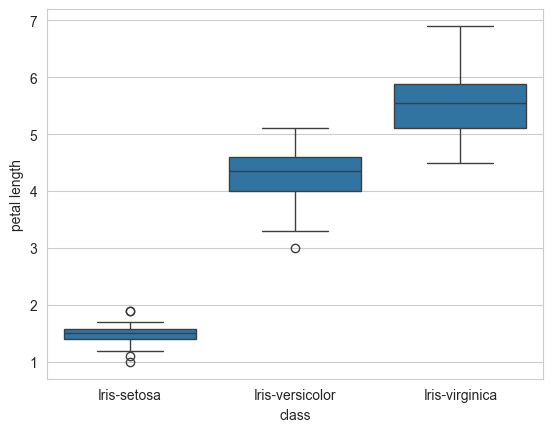

In [15]:
sns.boxplot(x='class', y='petal length', data=iris_df)

<Axes: xlabel='class', ylabel='petal length'>

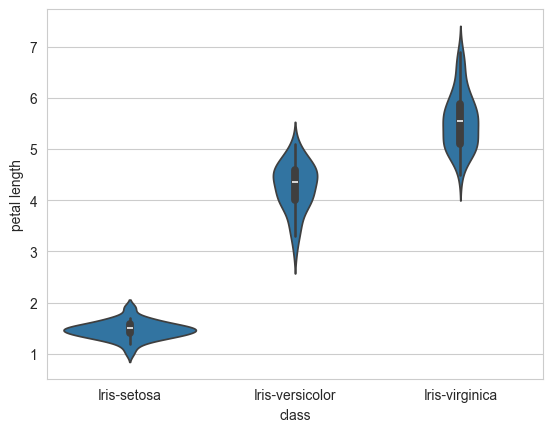

In [16]:
sns.violinplot(x="class", y="petal length", data=iris_df)

Text(0.5, 1.0, 'Box plot of Iris Dataset')

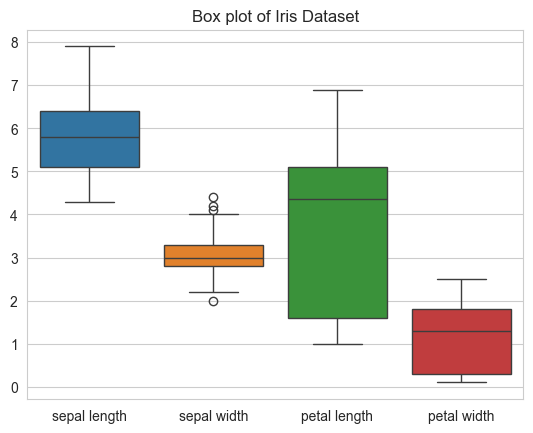

In [17]:
sns.boxplot(data=iris_df.drop('class', axis=1))
plt.title('Box plot of Iris Dataset')

## Histogramy z podziałem na odmiany

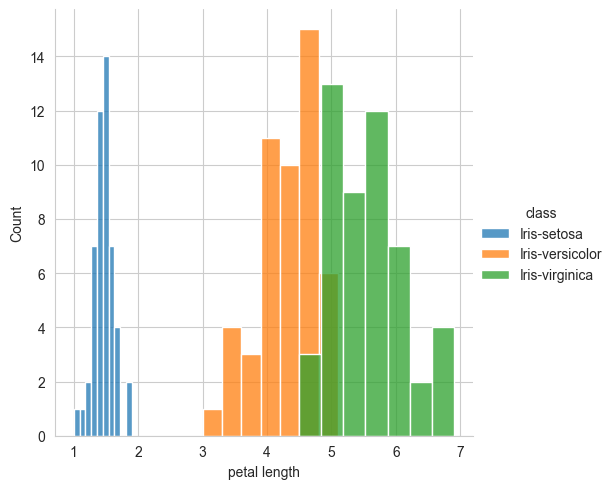

In [18]:
sns.FacetGrid(iris_df, hue="class", height=5).map(sns.histplot, "petal length").add_legend()

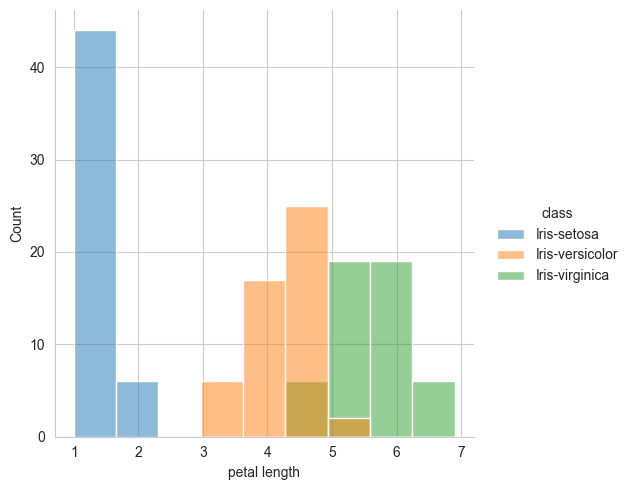

In [19]:
sns.displot(data=iris_df, x='petal length', hue='class', kind='hist', height=5)

## Przykład słabej wizualizacji danych

<Axes: xlabel='sepal length', ylabel='sepal width'>

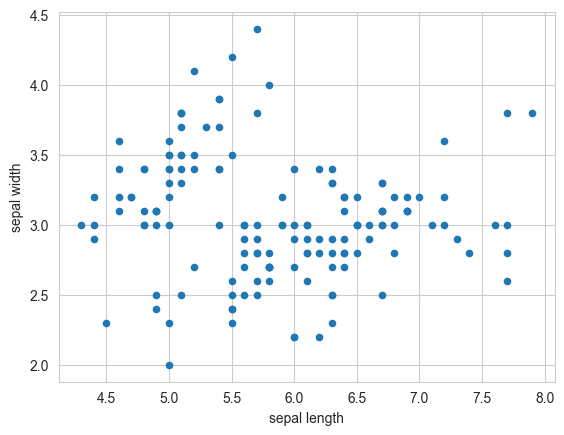

In [20]:
iris_df.plot(kind='scatter', x='sepal length', y='sepal width')

## Przykład lepszej wizualizacji danych

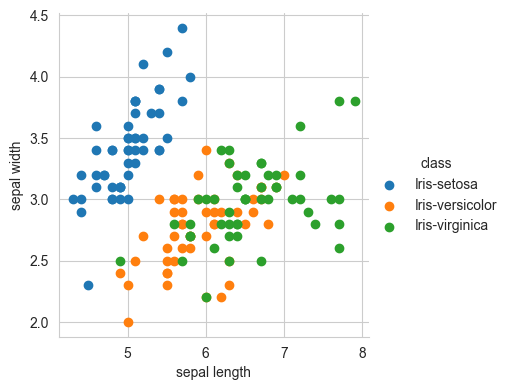

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_df, hue='class', height=4).map(plt.scatter, 'sepal length', 'sepal width').add_legend()

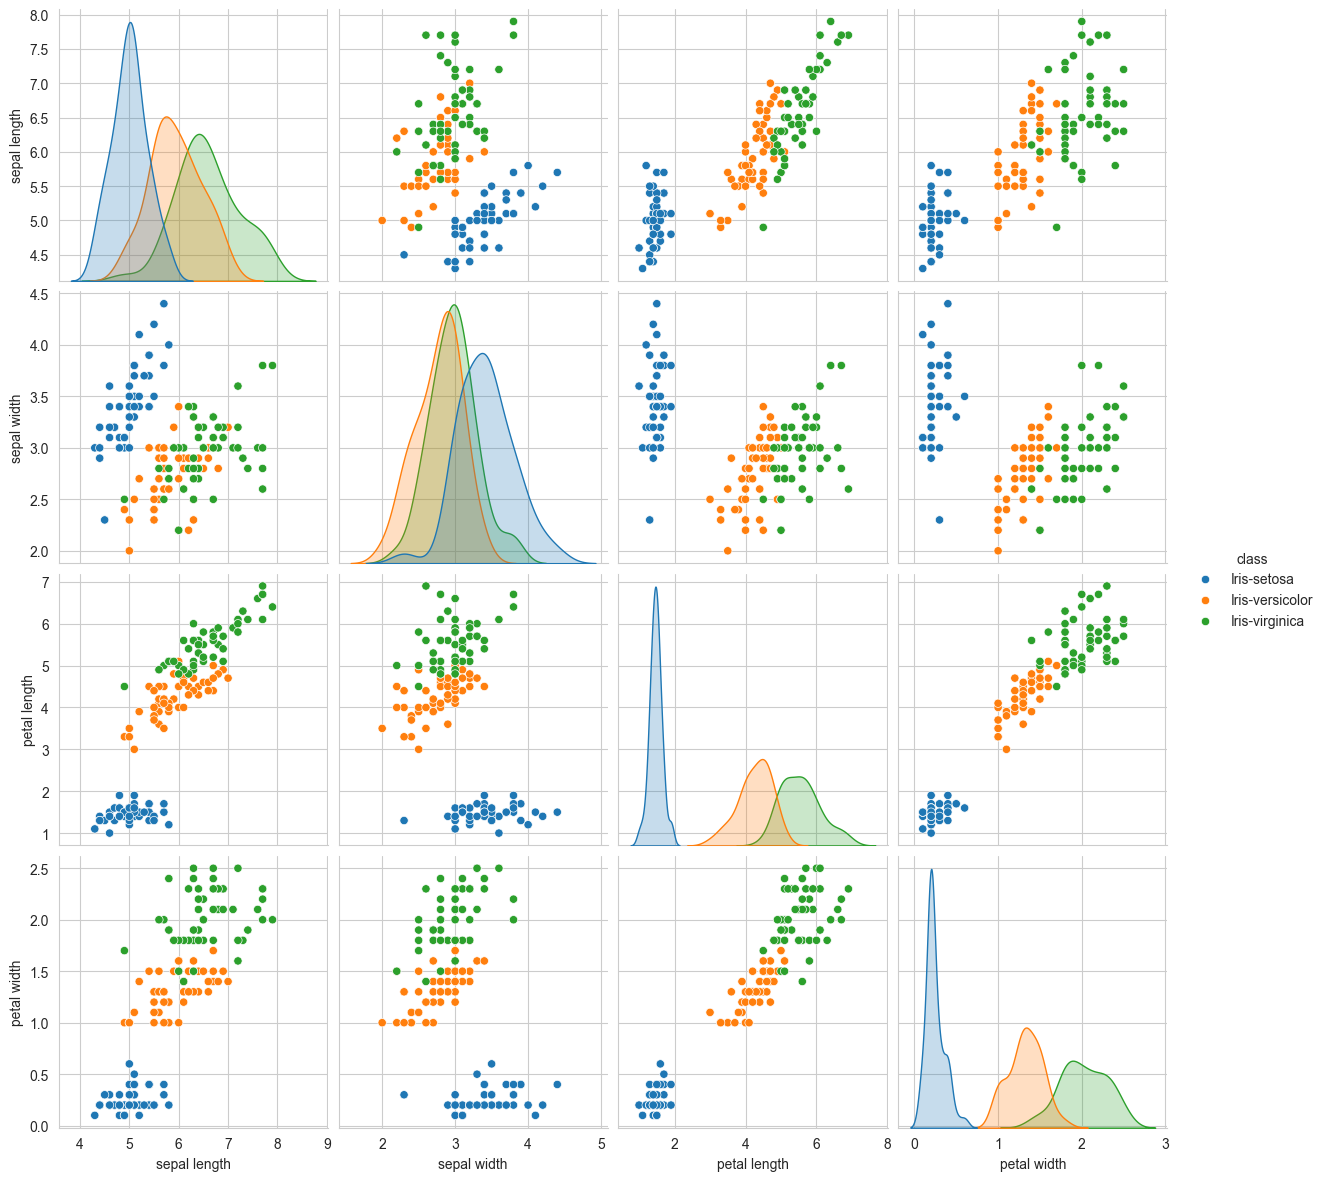

In [22]:
sns.pairplot(iris_df, hue='class', height=3)

## Bardziej zaawanosowana wizualizacja danych

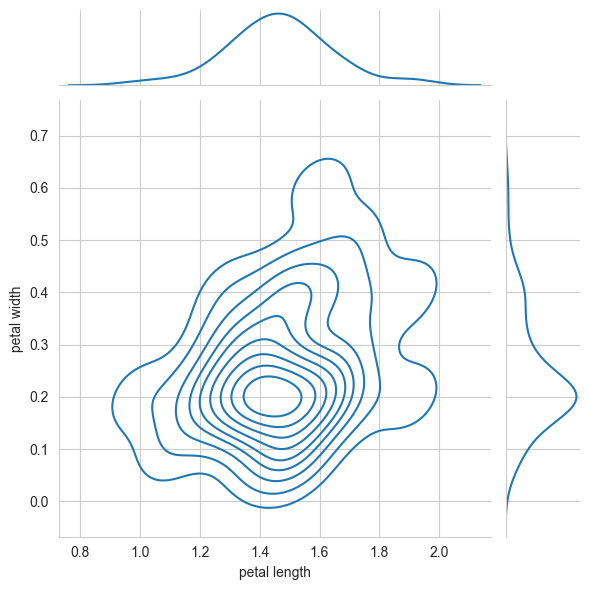

In [23]:
sns.jointplot(x='petal length', y='petal width', data=iris_df[iris_df['class'] == 'Iris-setosa'], kind='kde')

## PDF AND CDF 

Text(0.5, 1.0, 'Iris-setosa')

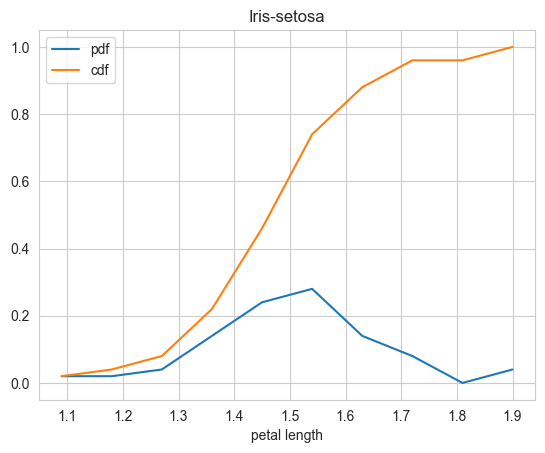

In [24]:
iris_setosa = iris_df[iris_df['class'] == 'Iris-setosa']
counts, bin_edges = np.histogram(iris_setosa['petal length'], bins=10, density=True)

pdf = counts / sum(counts)
cdf = np.cumsum(pdf) 

plt.plot(bin_edges[1:], pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.xlabel('petal length')
plt.legend(loc='best')
plt.title('Iris-setosa')


## Korelacja - analiza korelacji

<Axes: >

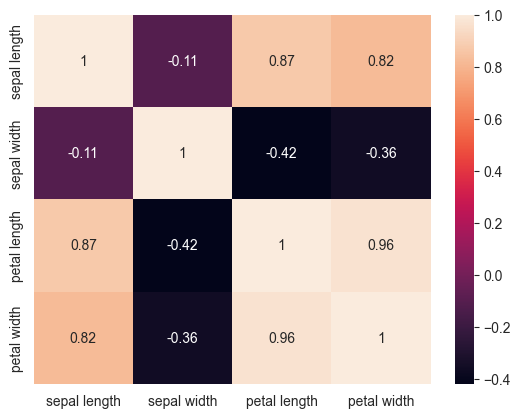

In [25]:
corr_matrix = iris_df[['sepal length', 'sepal width', 'petal length', 'petal width']].corr()
sns.heatmap(corr_matrix, annot=True)

## Dimensionality Reduction


## Principal Component Analysis (PCA)

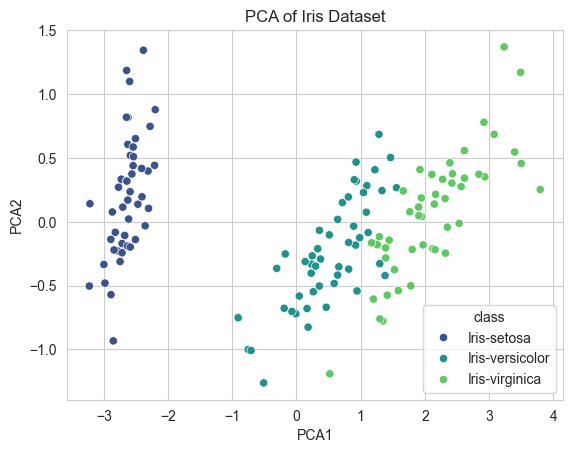

In [26]:
from sklearn.decomposition import PCA
iris_numeric = iris_df.drop('class', axis=1) 

pca = PCA(n_components=2) 
iris_pca = pca.fit_transform(iris_numeric) 

iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PCA1', 'PCA2']) 
iris_pca_df['class'] = iris_df['class']

sns.scatterplot(data=iris_pca_df, x='PCA1', y='PCA2', hue='class', palette='viridis')
plt.title('PCA of Iris Dataset')
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

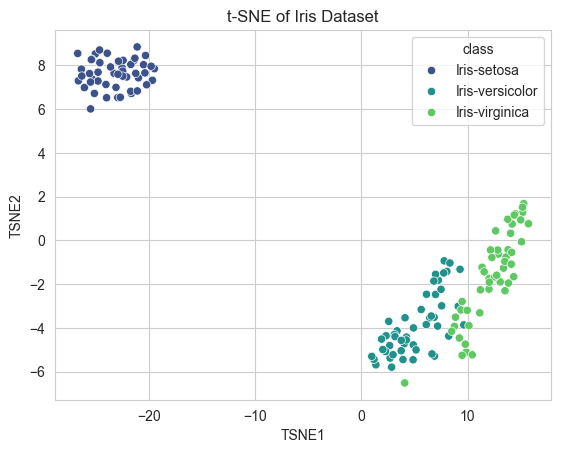

In [27]:
from sklearn.manifold import TSNE

iris_df_copy = iris_df.copy()

iris_features = iris_df_copy.drop(columns=['class'])

tsne = TSNE(n_components=2, random_state=42)
iris_tsne = tsne.fit_transform(iris_features)

iris_df_copy['TSNE1'] = iris_tsne[:, 0]  
iris_df_copy['TSNE2'] = iris_tsne[:, 1]  

sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=iris_df_copy, palette='viridis')
plt.title('t-SNE of Iris Dataset')
plt.show()

## Radar plot without standardization

                 sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


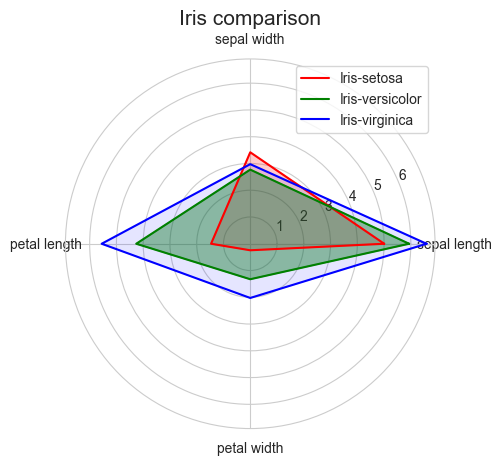

In [28]:
def plot_radar_chart(df):
    group_by_iris = df.groupby('class').mean()
    print(group_by_iris)
    
    group_by_iris[''] = group_by_iris.iloc[:, 0]
    
    angle = np.linspace(start=0, stop=2 * np.pi, num=len(group_by_iris.columns))
    
    plt.subplot(polar=True)
    plt.title('Iris comparison', size=15)
    labels = plt.thetagrids(np.degrees(angle), labels=group_by_iris.columns.values)
    
    plt.plot(angle, group_by_iris.loc['Iris-setosa'].values, label='Iris-setosa', color='r')
    plt.fill(angle, group_by_iris.loc['Iris-setosa'].values, alpha=0.2, color='r')
    
    plt.plot(angle, group_by_iris.loc['Iris-versicolor'].values, label='Iris-versicolor', color = 'green', alpha = 1)
    plt.fill(angle, group_by_iris.loc['Iris-versicolor'].values, alpha=0.4, color = 'green')
    
    plt.plot(angle, group_by_iris.loc['Iris-virginica'].values, label='Iris-virginica', color = 'blue')
    plt.fill(angle, group_by_iris.loc['Iris-virginica'].values, alpha=0.1, color='blue')
    
    plt.legend()

plot_radar_chart(iris_df)


## Parallel coordinates plot without standardization

<Axes: >

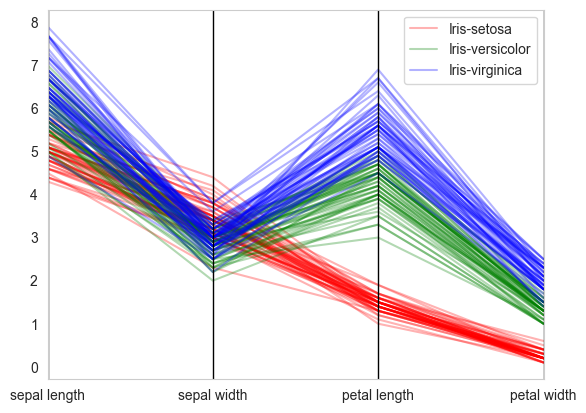

In [29]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_df, 'class', color=('r', 'g', 'b'), alpha=0.3)


## Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data.features)

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.data.features.columns)
iris_scaled_df['class'] = iris_df['class']

print(iris_scaled_df.head())
print(iris_scaled_df.describe())

   sepal length  sepal width  petal length  petal width        class
0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa
3     -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa
4     -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa
       sepal length   sepal width  petal length   petal width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00


## Radar plot with standardization

                 sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa         -1.014579     0.842307     -1.304878    -1.255129
Iris-versicolor      0.112282    -0.657184      0.285087     0.167409
Iris-virginica       0.902297    -0.185122      1.019792     1.087720


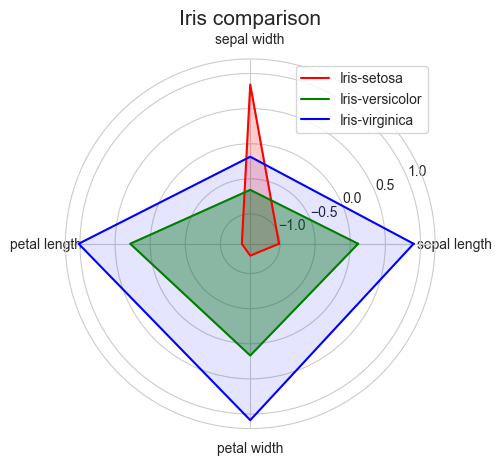

In [31]:
plot_radar_chart(iris_scaled_df)

## Parallel coordinates plot with standardization

<Axes: >

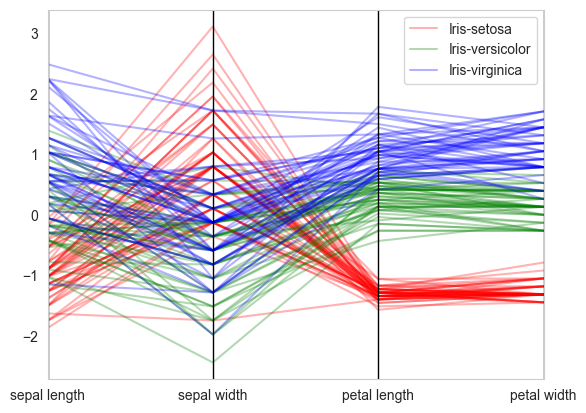

In [32]:
parallel_coordinates(iris_scaled_df, 'class', color=('r', 'g', 'b'), alpha=0.3)

# Machine Learning models

## Preparing Data

In [33]:
from sklearn.model_selection import train_test_split
X = iris.data.features
y = iris.data.targets
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state= 1)

## Decision Tree


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
iris_tree_model = DecisionTreeClassifier(random_state= 1)
iris_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [36]:
val_predictions = iris_tree_model.predict(X_val)

## Accuracy

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy = accuracy_score(val_predictions, y_val)
print("accuracy: " + str(accuracy))

accuracy: 0.9736842105263158


## Plot tree

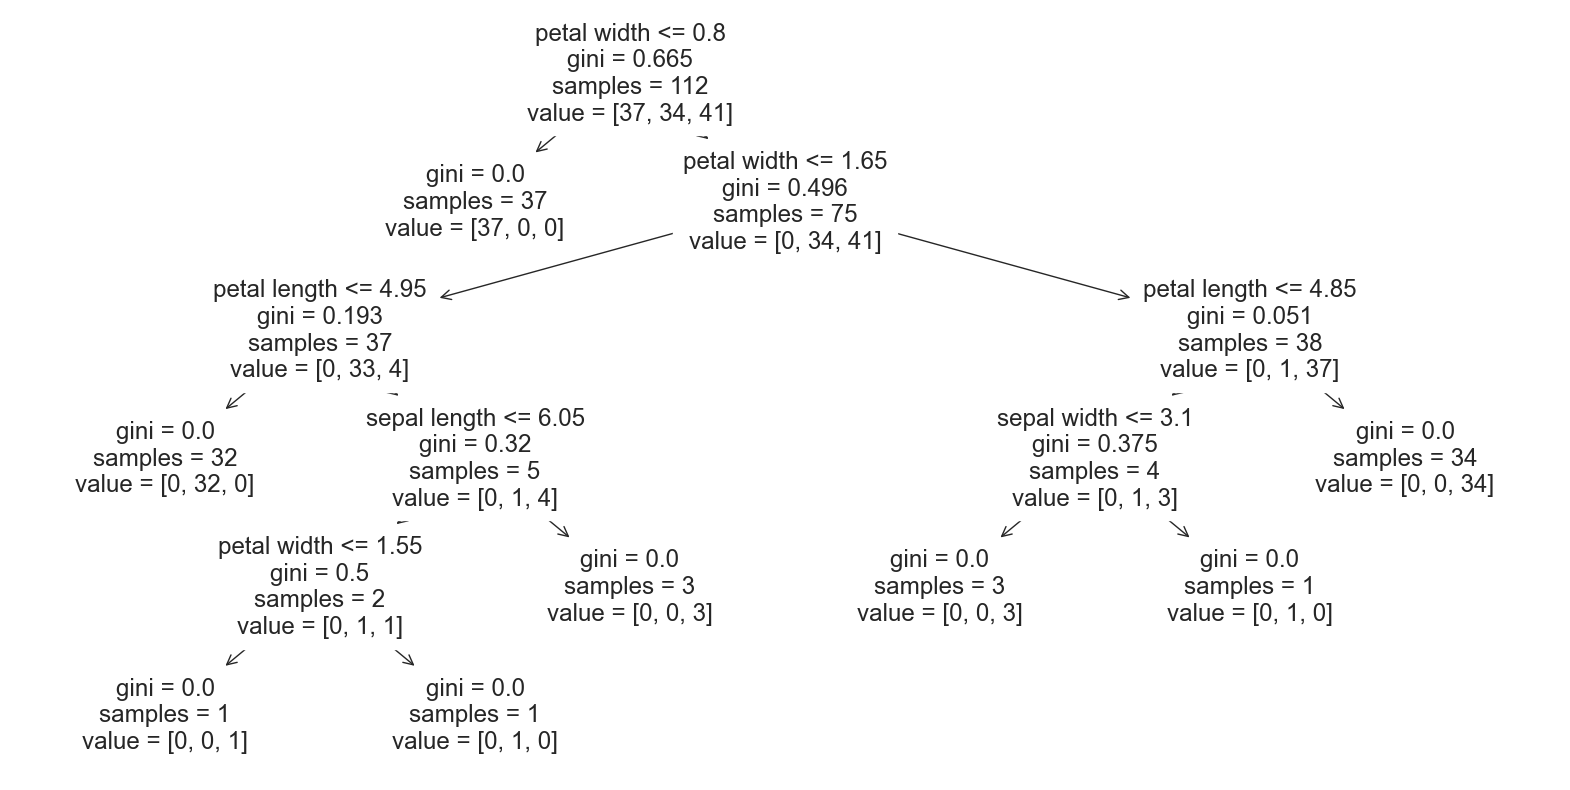

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(iris_tree_model, feature_names= X.columns)
plt.show()

# GradientBoostingRegressor

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbm_model = GradientBoostingClassifier(random_state = 1, n_estimators= 9000)
gbm_model.fit(X_train, y_train['class'])
val_predictions1 = gbm_model.predict(X_val)

## Accuracy

In [42]:
accuracy = accuracy_score(val_predictions1, y_val)
print("accuracy: " + str(accuracy))

accuracy: 0.9736842105263158


# Handling with missing values
1. Drop columns with missing value
2. Inpute missing value
   - with mean
    - with median
    - with most frequent value
    - fill with -1 (if feature column constains only positive numbers) 
    (we can mark missing value by adding extra column "sth_was_missing" 
    - with model which predict missing values (most advanced approach) 

# Handling with categorical data

1. Encoding (from 0 to n-1)
2. Binarization (swapping to 0 and 1)
3. One-hot encoding (creates new columns indicating the presence (or absence) of each possible value in the original data.)
 - Binarization vs one-hot encoding
   - in binarization we code from 0 to n-1 BINARY 
   - in one-hot encoding we code one 1 and rest 0
4. Adding new column with number of categories frequency
5. Entity embedding

Definitions
 - Nominal variables  - variables without an intrinsic ranking (e.g. color, country)
 - Ordinal variables - variables with an intrinsic ranking (e.g. education level, income level)